# Sub-task 1: Unsupervised Learning

To find the best number of clusters for segmenting customers in the given ecommerce dataset we can go through the following steps. Implement them using Python;

## 1. Loading and preparing the data
**a. Load the dataset:** Using pandas to import the CSV file.

**b. Cleaning the data:** Check for any irrelevant information and handle it accordingly (e.g. filling in missing values removing irrelevant entries).

**c. Selecting features**: Determining which features are important for clustering.

**d. Normalize the data:** Scaling all features to ensure treatment using methods, like StandardScaler or MinMaxScaler.


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('C:\\Users\\glawi\\OneDrive\\Desktop\\New folder\\ML Course work 2\\ecommerce.csv')

# Display the first few rows of the dataset
df.head()

,feature1,feature2,feature3,feature4,feature5
0,-7.0237,-2.7803,-1.5966,0.2197,-5.9672
1,-9.4213,9.1296,7.2426,-4.7139,-5.2615
2,-9.3710,9.4341,6.1217,-3.4081,-7.5911
3,-2.5985,4.1524,3.1033,1.5943,-8.7513
4,-0.8058,10.4453,5.6170,1.5003,-5.7412


In [8]:
# Data cleaning 
df.dropna(inplace=True)

# Feature selection 
features = df[['feature1', 'feature2', 'feature3','feature4', 'feature5']]  

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 2. Exploratory Data Analysis 

Visualize the data : Use seaborn or matplotlib to plot distributions or relationships between features.

c:\Users\glawi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


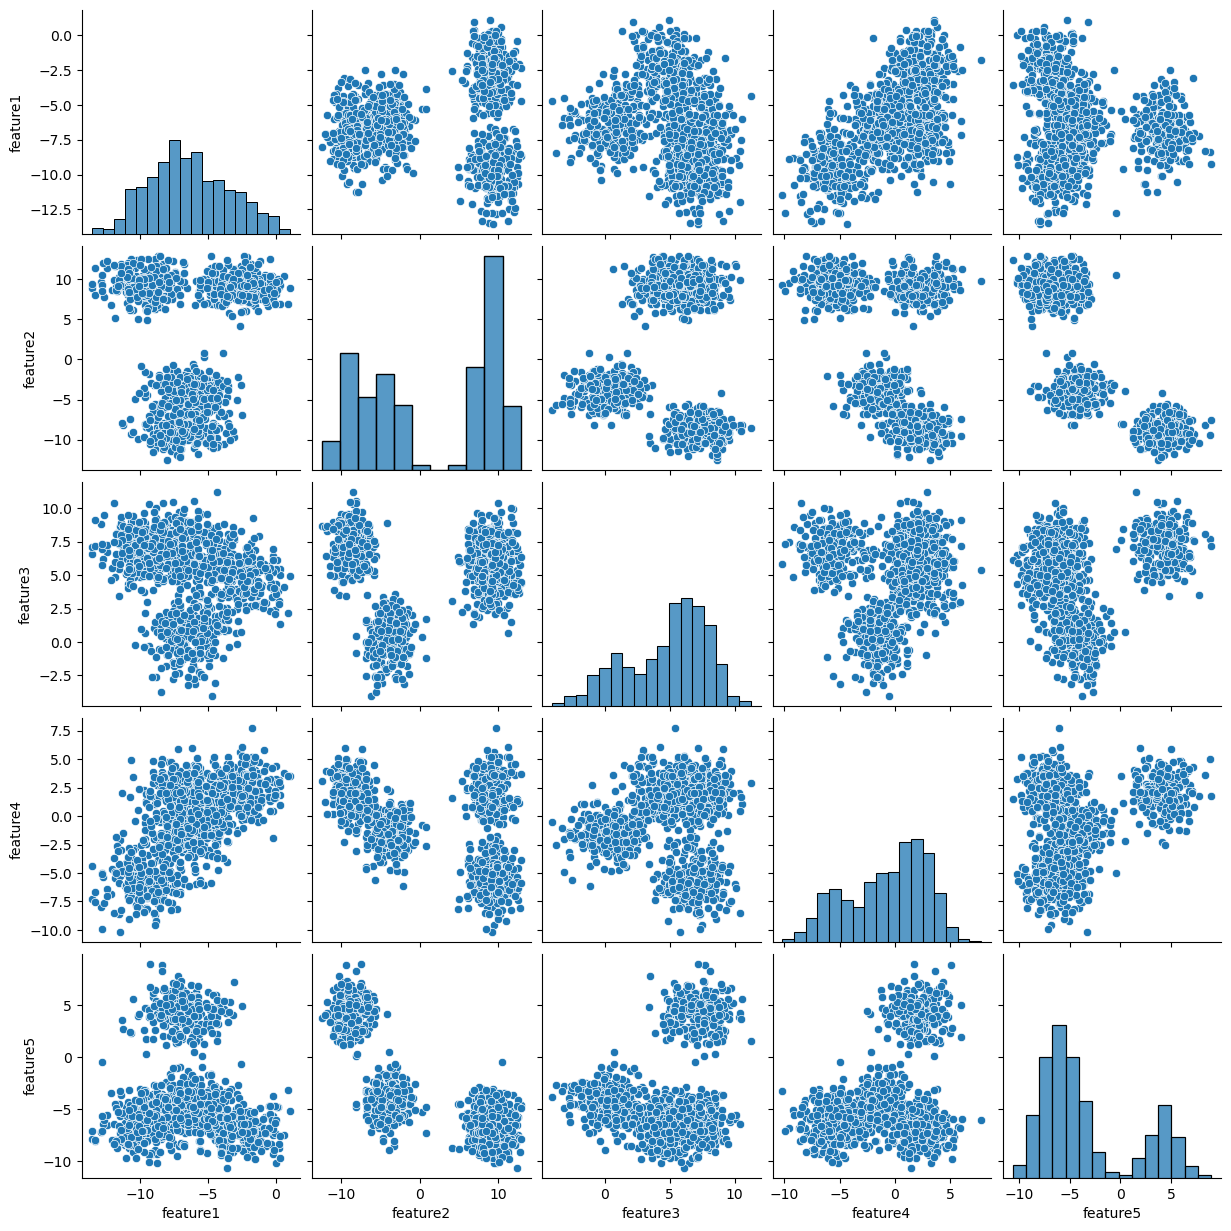

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

## 3. Finding the Best Number of Clusters

**a. Elbow Method:** Using the K means algorithm with cluster numbers and graph the within cluster sum of squares (WCSS) to locate the bending point.

**b. Silhouette Score:** Calculating the silhouette score, for cluster quantities to determine the ideal number.

c:\Users\glawi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\glawi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\glawi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\glawi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

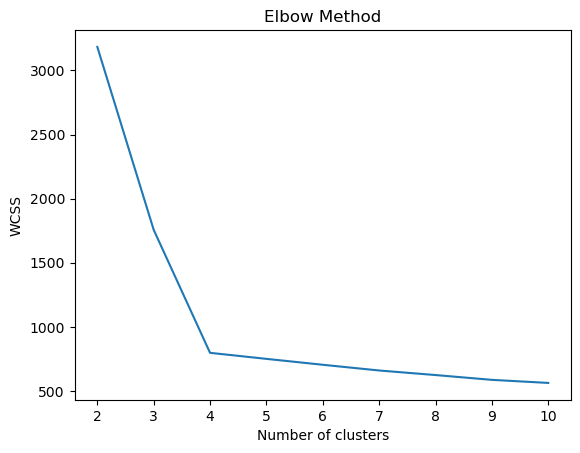

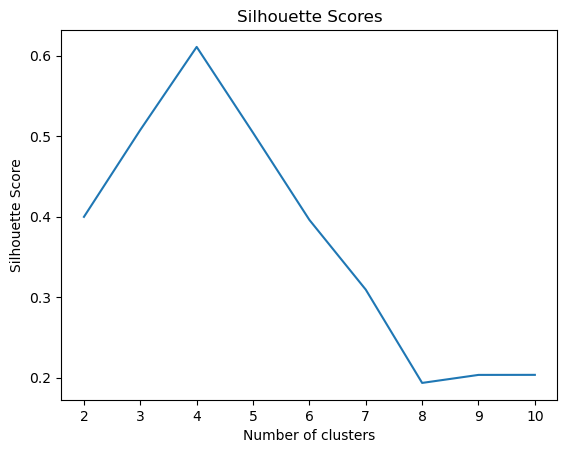

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []
for i in range(2, 11):
    # Updated KMeans initialization with explicit n_init value
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0).fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plotting the results for Elbow Method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plotting the results for Silhouette Scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## 4. Clustering

**a. Utilize K means Clustering:** Once the ideal number of clusters has been established which in this case is 4, we implement K means clustering.

**b. Consider Clustering:** Alternatively we may also explore the option of employing hierarchical clustering and then compare the outcomes.

c:\Users\glawi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\glawi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


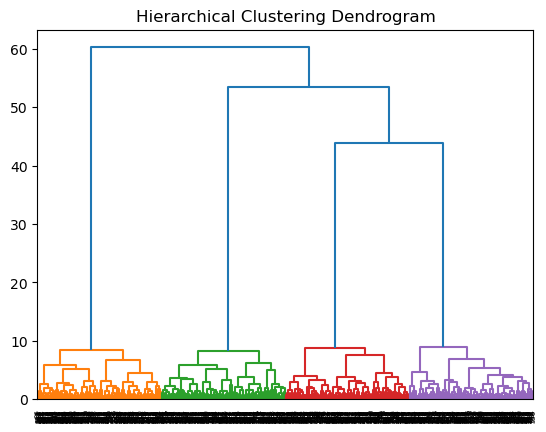

In [ ]:
# K-means clustering
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(scaled_features)
df['Cluster'] = kmeans.labels_

# Hierarchical clustering 
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_features, 'ward')
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## 5. Analyzing the Clusters

**a. Cluster Analysis:** Analyzing the properties of each cluster, like mean values of features.

**b. Visualization:** Using PCA or t-SNE for dimensionality reduction to visualize the clusters.

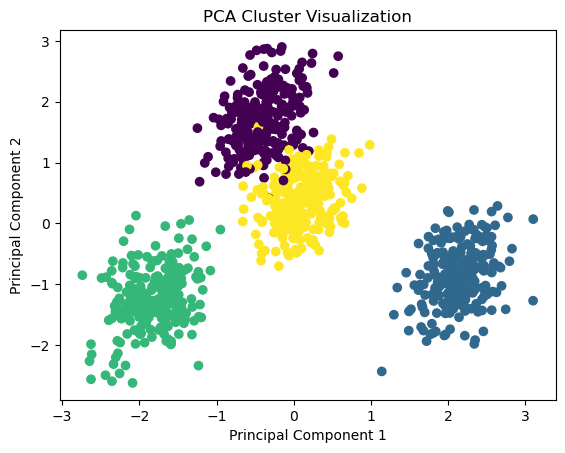

In [ ]:
# Analyzing clusters
cluster_analysis = df.groupby('Cluster').mean()

# Visualization using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['Cluster'])
plt.title('PCA Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 6. Conclusion

In summary after analyzing the e commerce dataset to segment customers we discovered groups with their own unique behaviors and preferences. We used K means clustering, guided by the Elbow method and Silhouette scores which provided a framework for identifying these groups. The Elbow method helped us find the balance between the number of clusters and within cluster variance while the Silhouette scores confirmed that these clusters were well defined and separate, from each other. By considering these metrics we ensured that each segment was distinct and meaningful. This segmentation will allow us to create targeted marketing strategies and gain a deeper understanding of customer needs ultimately leading to better business decisions.
